# LetsGrowMore Virtual Internship Program (VIP) -  2023
Beginner Level
Task-2 : Stock Market Prediction And Forecasting Using Stacked LSTM
Name:Akshay Pawar

In [52]:
# Importing The Libraries
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Reading The Dataset
dataset=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [54]:
# Sorting The Values According To The Order Of Date
dataset["Date"]=pd.to_datetime(dataset["Date"])
data=dataset.sort_values(by="Date")
data.reset_index(inplace=True)
data.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [55]:
# Isolating The Close Column Of The Dataset
data_new=data.reset_index()["Close"]

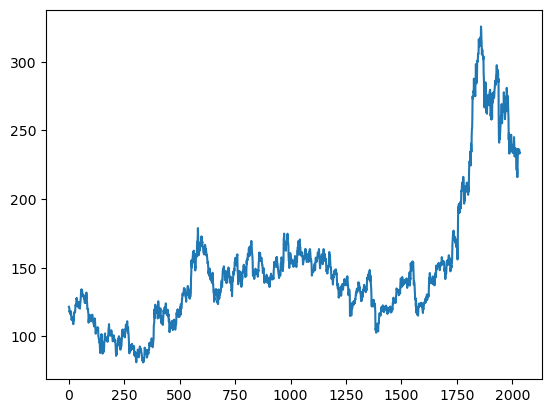

In [56]:
# Visualising The Dataset With The Close Price Column
plt.plot(data_new)

In [57]:
# Scaling The Dataset Values To a Range (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_new=scaler.fit_transform(np.array(data_new).reshape(-1,1))

In [58]:
print(data_new)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [59]:
# Splitting The Dataset Into Training Set & Test Set
training_size=int(len(data_new)*0.65)
test_size=len(data_new)-training_size
train_data,test_data=data_new[0:training_size,:],data_new[training_size:len(data_new),:1]

In [60]:
training_size,test_size

(1322, 713)

In [61]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [62]:
test_data

array([[0.19219771],
       [0.19281046],
       [0.21058007],
       [0.19526144],
       [0.20404412],
       [0.21589052],
       [0.2124183 ],
       [0.21813725],
       [0.22058824],
       [0.22875817],
       [0.23120915],
       [0.22589869],
       [0.22569444],
       [0.22038399],
       [0.21527778],
       [0.22222222],
       [0.22079248],
       [0.20915033],
       [0.22201797],
       [0.21343954],
       [0.21813725],
       [0.21609477],
       [0.22712418],
       [0.25020425],
       [0.24897876],
       [0.25306373],
       [0.24611928],
       [0.24938725],
       [0.26082516],
       [0.25776144],
       [0.24897876],
       [0.26715686],
       [0.26654412],
       [0.26736111],
       [0.2563317 ],
       [0.2753268 ],
       [0.2626634 ],
       [0.24142157],
       [0.25939542],
       [0.24897876],
       [0.23917484],
       [0.22324346],
       [0.21691176],
       [0.1942402 ],
       [0.16707516],
       [0.18566176],
       [0.16993464],
       [0.166

In [63]:

import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [64]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [65]:
# Reshaping the data variables to fit the Stacked LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_train.shape[1],1)

In [66]:
len(test_data)

713

In [67]:
# Reshaping The New Values For Forecasting 
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [68]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [69]:
new_day=np.arange(1,101)
new_day_pred=np.arange(101,131)

In [70]:
len(data_new)

2035

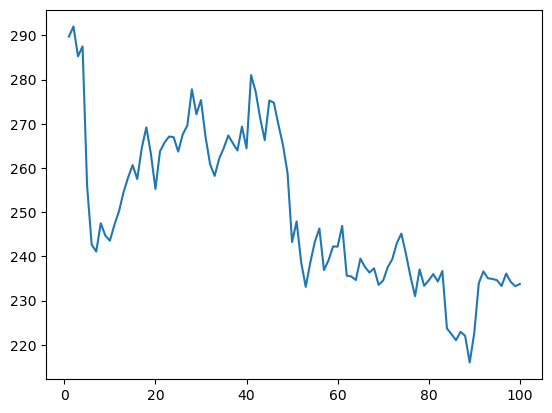

In [71]:
plt.plot(new_day,scaler.inverse_transform(data_new[1935:]))
#plt.plot(new_day_pred,scaler.inverse_transform(output_list))

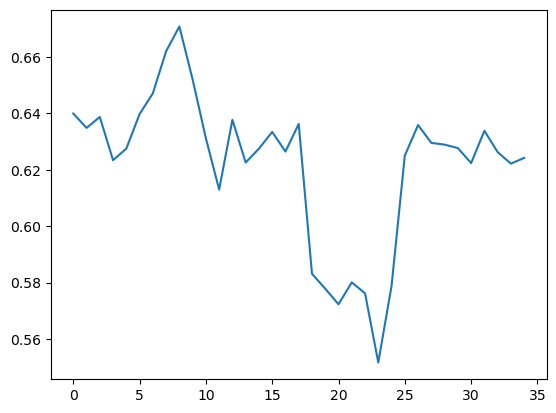

In [72]:
data_forecast=data_new.tolist()
data_forecast.extend(output_list)
plt.plot(data_forecast[2000:])

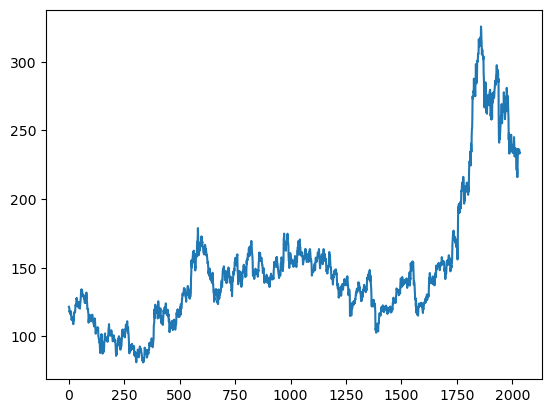

In [73]:
data_forecast=scaler.inverse_transform(data_forecast).tolist()
plt.plot(data_forecast)